# An introduction to neural nets and convnets with Keras

In [20]:
# setup imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import tqdm # for fancy progress bars
import keras
import ipywidgets as widgets

## A simple neural net with keras

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_shape = (2,)))
model.compile(optimizer=keras.optimizers.SGD(),loss="binary_crossentropy")
model.summary()

/Users/davebrunner/.local/share/virtualenvs/TSM_CompVis-khMN_Opv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.layers

[<Dense name=dense_4, built=True>]

Get the (randomly initialized) weights

In [23]:
model.layers[0].get_weights()

[array([[0.00686693],
        [1.1139573 ]], dtype=float32),
 array([0.], dtype=float32)]

Set the weights

In [24]:
weights = np.array([[0.8],[-1.0]])
bias = np.array([4.0])
model.layers[0].set_weights([weights, bias])

And predict

In [25]:
data = np.array([[10,20]])
model.predict(data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[-8.]], dtype=float32)

We can also compute gradients (of anything w.r.t. anything!)

In [27]:
grads = keras.backend.gradients(model.output, model.weights)
f = keras.backend.function([model.input], grads)
myInput = np.array([[1,3]])
gradients_of_parameters = f([myInput])
print("Gradients of the output w.r.t. the weights:\n",gradients_of_parameters[0])
print("Gradients of the output w.r.t. the bias:\n",gradients_of_parameters[1])

AttributeError: module 'keras.api.backend' has no attribute 'gradients'

Let's make a dataset for classification

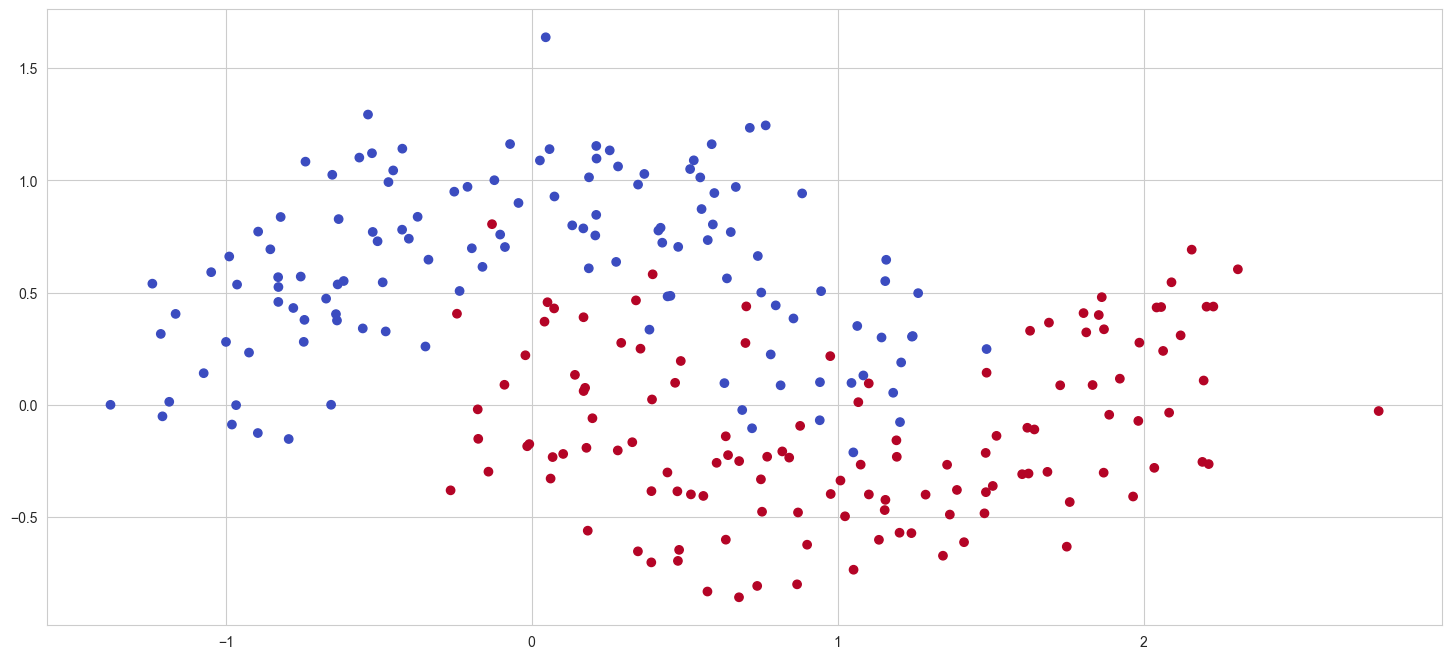

In [29]:
X,y = sklearn.datasets.make_moons(n_samples=250, shuffle=True, noise=0.25, random_state=None)
fig,ax = plt.subplots(figsize=(18,8))         
ax.scatter(X[:,0],X[:,1],c = y.astype(float), cmap="coolwarm")

xgrid,ygrid = np.meshgrid(np.linspace(np.min(X[:,0]),np.max(X[:,0]),100),
                          np.linspace(np.min(X[:,1]),np.max(X[:,1]),100))
gridinputs = np.vstack((xgrid.flatten(),ygrid.flatten())).T

A simple net

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_shape = (2,)))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="binary_crossentropy")

yhats = []
for i in tqdm.tqdm(list(range(10))):
    yhat = model.predict(gridinputs)
    yhat = np.reshape(yhat,xgrid.shape)
    yhats.append(yhat)
    model.fit(X,y,verbose = 0,epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 154us/step


 10%|█         | 1/10 [00:00<00:02,  3.04it/s]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step


 20%|██        | 2/10 [00:00<00:01,  4.24it/s]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step


 30%|███       | 3/10 [00:00<00:01,  4.86it/s]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step


 40%|████      | 4/10 [00:00<00:01,  5.19it/s]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step


 50%|█████     | 5/10 [00:01<00:00,  5.46it/s]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step


 60%|██████    | 6/10 [00:01<00:00,  5.68it/s]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step


 70%|███████   | 7/10 [00:01<00:00,  5.74it/s]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step


 80%|████████  | 8/10 [00:01<00:00,  5.73it/s]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step


 90%|█████████ | 9/10 [00:01<00:00,  5.79it/s]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step


100%|██████████| 10/10 [00:01<00:00,  5.39it/s]


interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

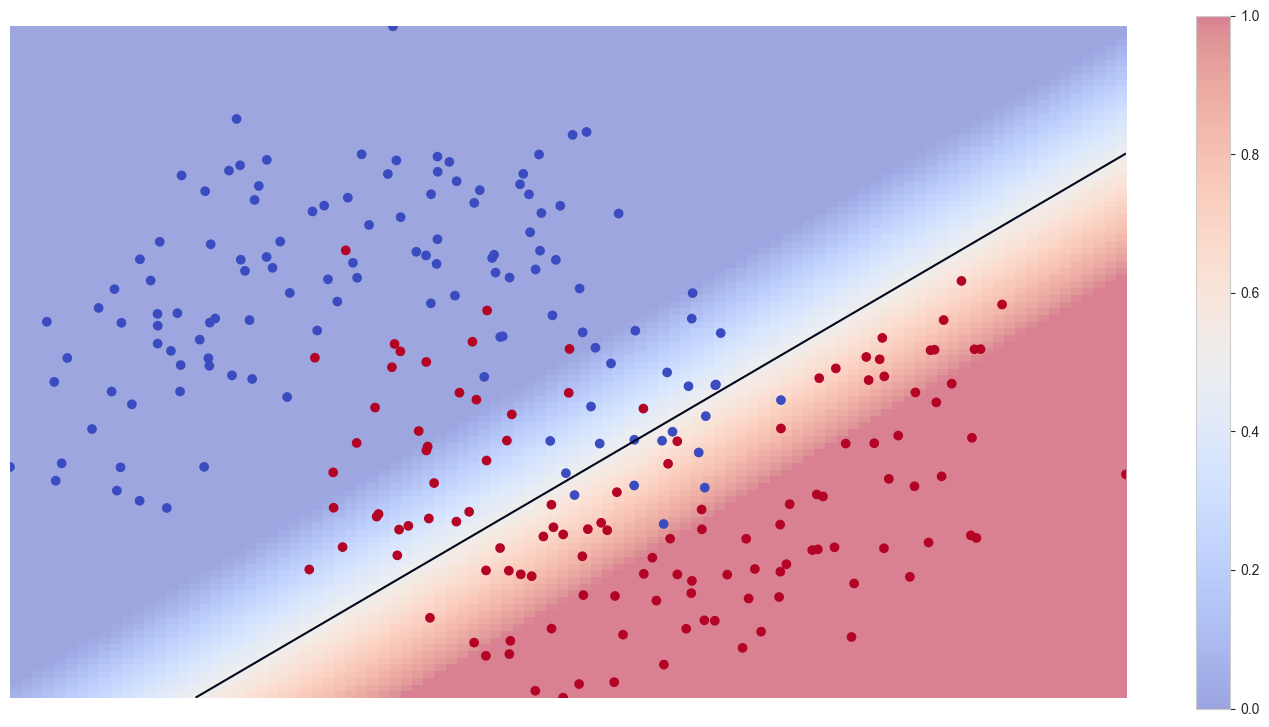

In [36]:
extent = (np.min(X[:,0]),np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1]))

@widgets.interact(i=widgets.IntSlider(min=0,max=len(yhats)-1,step=1,value=0))
def f(i):
    fig,ax = plt.subplots(figsize=(18,9))         
    him = ax.imshow(yhats[i], vmin = 0, vmax = 1, cmap = "coolwarm",
              extent = extent,
              alpha = 0.5, origin = "lower")
    ax.contour(yhats[i], [0.5], extent = extent)
    ax.scatter(X[:,0],X[:,1],c = y.astype(float), cmap="coolwarm")
    ax.axis("off")
    ax.autoscale(enable=True, axis='both', tight=True)
    plt.colorbar(him)

Let's try a larger net

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100,input_shape = (2,)))
model.add(keras.layers.Activation("sigmoid"))
model.add(keras.layers.Dense(100))
model.add(keras.layers.Activation("sigmoid"))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation("sigmoid"))
model.compile(optimizer=
                    keras.optimizers.Adam(lr=0.01),
                    loss="binary_crossentropy")

yhats = []
for i in tqdm.tqdm(list(range(80))):
    yhat = model.predict(gridinputs)
    yhat = np.reshape(yhat,xgrid.shape)
    yhats.append(yhat)
    model.fit(X,y,verbose = 0,epochs=40)

100%|██████████| 80/80 [00:32<00:00,  2.43it/s]


In [12]:
extent = (np.min(X[:,0]),np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1]))

@widgets.interact(i=widgets.IntSlider(min=0,max=len(yhats)-1,step=1,value=0))
def f(i):
    fig,ax = plt.subplots(figsize=(18,9))         
    him = ax.imshow(yhats[i], vmin = 0, vmax = 1, cmap = "coolwarm",
              extent = extent,
              alpha = 0.5, origin = "lower")
    ax.contour(yhats[i], [0.5], extent = extent)
    ax.scatter(X[:,0],X[:,1],c = y.astype(float), cmap="coolwarm")
    ax.axis("off")
    ax.autoscale(enable=True, axis='both', tight=True)
    plt.colorbar(him)
    

interactive(children=(IntSlider(value=0, description='i', max=79), Output()), _dom_classes=('widget-interact',))

## Part 2: let's create a basic convnet

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(1,(2,2),input_shape = (3,3,1)))
model.add(keras.layers.MaxPool2D((2,2)))
model.compile(optimizer=
              keras.optimizers.sgd(),
              loss="binary_crossentropy")

model.summary()

In [ ]:
img = np.array([
    [1,0,0],
    [0,2,0],
    [0,0,3]
])
weights = np.array([
    [0,1],
    [2,3]
])
model.layers[0].set_weights([
    weights[:,:,np.newaxis,np.newaxis],
    np.array([0.5])
])
model.predict(img[np.newaxis,:,:,np.newaxis])[0,:,:,0]

In [ ]:
grads = keras.backend.gradients(model.output, model.weights)
f = keras.backend.function([model.input], [grads[0]])
f([img[np.newaxis,:,:,np.newaxis]])[0][:,:,0,0]

A more complex quiz

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(2,(2,2),input_shape = (3,3,3)))
#model.add(keras.layers.MaxPool2D((2,2)))
model.compile(optimizer=
              keras.optimizers.sgd(),
              loss="binary_crossentropy")

model.count_params()

img0 = np.array([[0, 1, 0],
                 [0, 0, 0],
                 [0, 0, 0]])

img1 = np.array([[0, 0, 0],
                 [0, 0, 0],
                 [0, 0, 0]])

img2 = np.array([[0, 0, 0],
                 [0, 0, 0],
                 [0, 0,-2]])

img = np.stack((img0,img1,img2),axis=2)


weights00 = np.array([[0,1],
                      [2,3]])
weights01 = np.array([[0,0],
                      [0,1]])

weights10 = np.array([[0,0],
                      [0,0]])
weights11 = np.array([[0,0],
                      [0,0]])

weights20 = np.array([[0,1],
                      [2,3]])
weights21 = np.array([[5,4],
                      [8,7]])

weights = np.stack(
    (np.stack((weights00,weights10,weights20), axis=2),
     np.stack((weights01,weights11,weights21), axis=2)),
    axis = 3)

model.layers[0].set_weights([
    weights,
    np.array([0,0])
])
out = model.predict(img[np.newaxis,:,:,:])[0,:,:,:]
print(out[:,:,0])
print(out[:,:,1])